In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [17]:
#Lettura dei dati e creazione dei dataframe per i giocatori, i tornei e i match ATP dal 1968 al 2024 
atp_matches = pd.read_csv('Data/atpdata/atp_matches.csv')
atp_players = pd.read_csv('Data/atpdata/atp_players.csv')
atp_rankings = pd.read_csv('Data/atpdata/atp_rankings.csv', low_memory=False);
atp_matches['tourney_date'] = pd.to_datetime(atp_matches.tourney_date, format='%Y%m%d')

#Pallet di colori per i grafici
colors = ['#0ca26b', '#0da0a8', '#1977c9', '#3b59d3', '#5d3dd0' ]


## Intro tennis

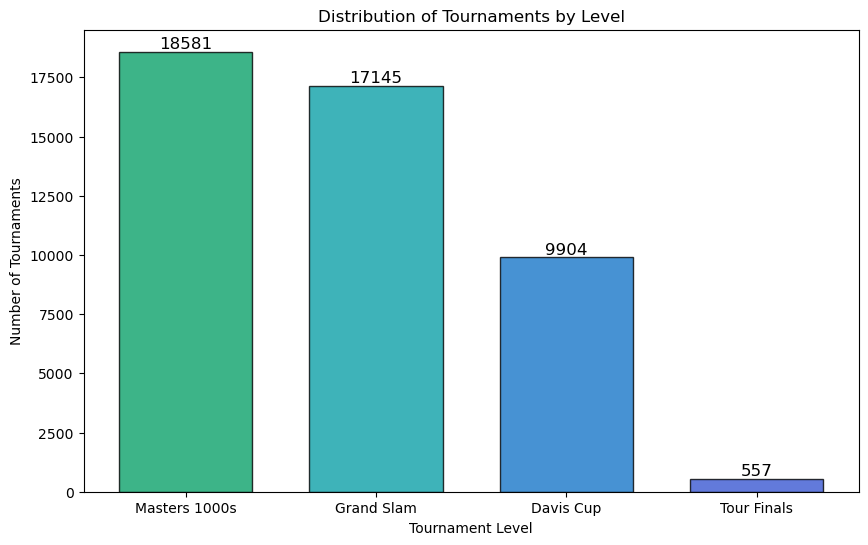

In [18]:
tournament_counts = atp_matches[atp_matches['tourney_level'] != 'A']['tourney_level'].value_counts()
tournament_counts = tournament_counts.rename(index={'C': 'Challengers', 'G': 'Grand Slam', 'D': 'Davis Cup', 'F': 'Tour Finals', 'M': 'Masters 1000s'})
plt.figure(figsize=(10, 6))
plt.bar(tournament_counts.index, tournament_counts, color=colors, edgecolor='black', alpha=0.8, align='center', width=0.7)

for i, count in enumerate(tournament_counts):
    plt.text(i, count+10, count, ha='center', va='bottom', fontsize=12)
plt.title('Distribution of Tournaments by Level')
plt.xlabel('Tournament Level')
plt.ylabel('Number of Tournaments')
plt.show()

## Distribuzione surface

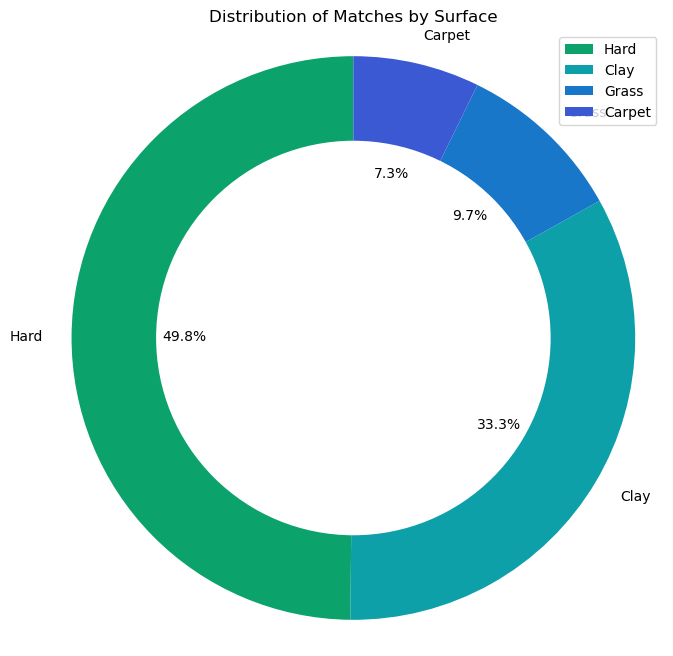

In [19]:
surface_counts = atp_matches['surface'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(surface_counts, labels=surface_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)
ax.set_title('Distribution of Matches by Surface')
ax.axis('equal')
ax.legend(wedges, surface_counts.index, loc='best')
plt.show()


C:\Users\Yassine\AppData\Local\Temp\ipykernel_9764\4132673045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carpet_matches['year'] = carpet_matches['tourney_date'].astype(str).str[:4]


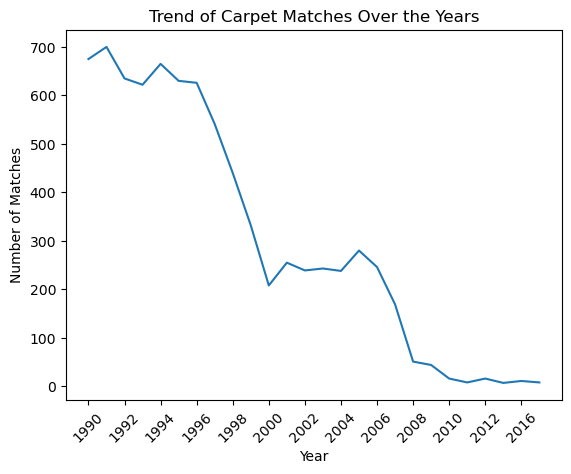

In [20]:
carpet_matches = atp_matches[atp_matches['surface'] == 'Carpet']
carpet_matches['year'] = carpet_matches['tourney_date'].astype(str).str[:4]
matches_per_year = carpet_matches.groupby('year').size()

plt.plot(matches_per_year.index, matches_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Trend of Carpet Matches Over the Years')

plt.xticks(matches_per_year.index[::2], rotation=45)


plt.show()

## Cambiamento del tennis

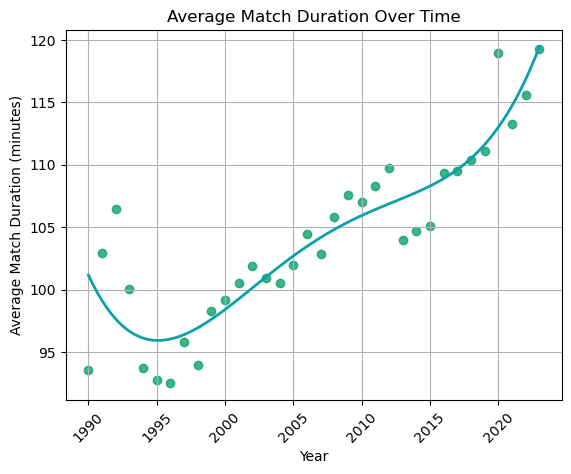

In [26]:
atp_matches['tourney_date'] = pd.to_datetime(atp_matches['tourney_date'], format='%Y%m%d')
atp_matches['year'] = atp_matches['tourney_date'].dt.year
average_duration = atp_matches.groupby('year')['minutes'].mean()

x = average_duration.index
y = average_duration.values
coefficients = np.polyfit(x, y, 4)
polynomial = np.poly1d(coefficients)
x_smooth = np.linspace(x.min(), x.max(), 100)
y_smooth = polynomial(x_smooth)

plt.scatter(x, y, color=colors[0], alpha=0.8)
plt.plot(x_smooth, y_smooth, color=colors[1], linewidth=2)
plt.xlabel('Year')
plt.ylabel('Average Match Duration (minutes)')
plt.title('Average Match Duration Over Time')
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()

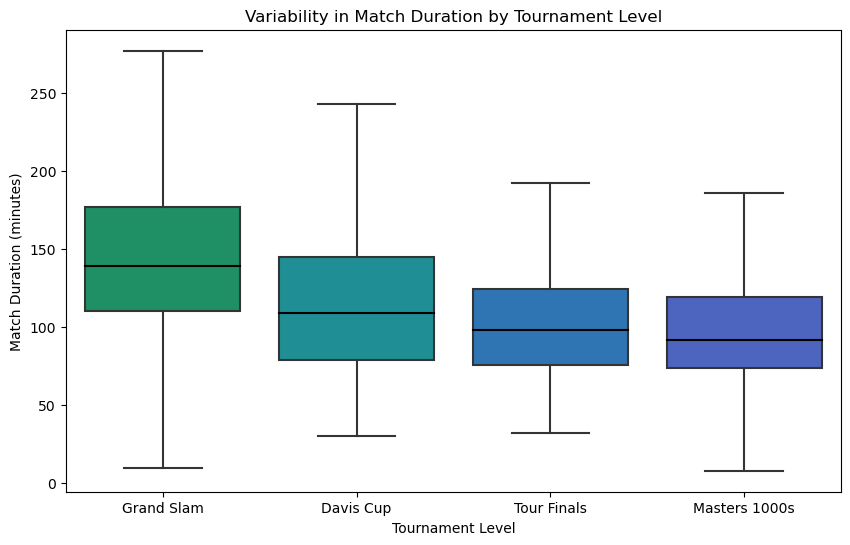

In [22]:
import seaborn as sns
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=atp_matches[(atp_matches['tourney_level'] != 'C') & (atp_matches['tourney_level'] != 'S') & (atp_matches['tourney_level'] != 'A')], x='tourney_level', y='minutes', order=['G', 'D', 'F', 'M'], showfliers=False, palette=colors, showmeans=False, medianprops={'color':"black"})
ax.set_xticklabels(['Grand Slam', 'Davis Cup', 'Tour Finals', 'Masters 1000s'])
plt.title('Variability in Match Duration by Tournament Level')
plt.xlabel('Tournament Level')
plt.ylabel('Match Duration (minutes)')
plt.show()



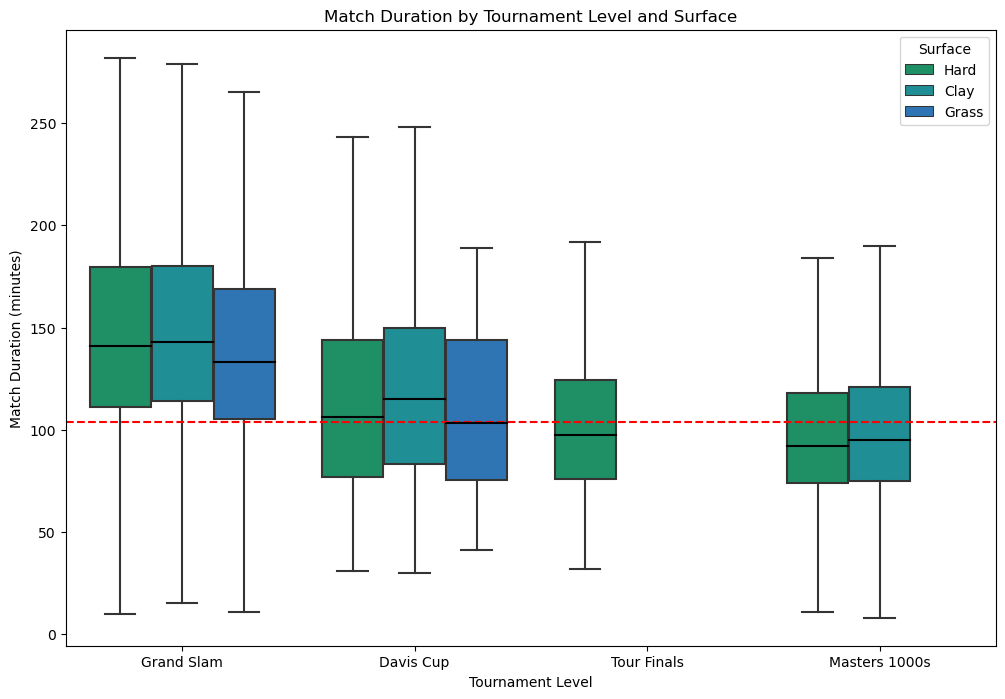

In [23]:
plt.figure(figsize=(12, 8))
surface_order = ['Hard', 'Clay', 'Grass']
ax = sns.boxplot(data=atp_matches[(atp_matches['tourney_level'] != 'C') & (atp_matches['tourney_level'] != 'S') & (atp_matches['tourney_level'] != 'A')], x='tourney_level', y='minutes', hue='surface', order=['G', 'D', 'F', 'M'], hue_order=surface_order, palette=colors, showfliers=False, showmeans=False, medianprops={'color': 'black'})
ax.set_xticklabels(['Grand Slam', 'Davis Cup', 'Tour Finals', 'Masters 1000s'])
plt.title('Match Duration by Tournament Level and Surface')
plt.xlabel('Tournament Level')
plt.ylabel('Match Duration (minutes)')
plt.legend(title='Surface')

overall_mean = atp_matches['minutes'].mean()

ax.axhline(overall_mean, color='red', linestyle='--', label='Overall Mean')

plt.show()